In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_csv(r"C:\Users\user\Videos\Datasets\umojahack-africa-2022-beginner-challenge\train.csv")
test_data = pd.read_csv(r"C:\Users\user\Videos\Datasets\umojahack-africa-2022-beginner-challenge\test.csv")

In [5]:
train_data.head()

ID             Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
0  ID_QF0ZTQJ2SF5Q  2021-11-03 04:06:31          52.58          49.52   
1  ID_4GTK689CNX5S  2021-11-08 18:43:23          35.25          33.40   
2  ID_DL7VVKW9U7XQ  2021-11-07 09:50:33          19.18          23.50   
3  ID_6XQOMBXM2DG3  2022-01-01 18:55:15          19.40          15.48   
4  ID_UQZW9ISJY9QE  2021-11-05 22:23:48          38.30          34.77   

   Temperature  Relative_Humidity  Offset_fault  
0         17.4               96.0             0  
1         25.0               75.0             0  
2         24.9               75.0             0  
3         24.9               70.0             0  
4         20.9               89.0             0

In [6]:
test_data.head()

ID             Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
0  ID_STL3V9B2OU12  2022-01-28 08:49:41          90.75         114.78   
1  ID_U2EKAY4SGA94  2022-02-16 21:30:17          56.03          52.18   
2  ID_UJFLEWQR0U4N  2022-01-24 17:57:18         387.35         346.73   
3  ID_S2C2GPGA4R5I  2022-01-31 07:07:09          63.17          83.85   
4  ID_5V2C2ZL221H8  2022-01-31 00:37:05          69.23          53.07   

   Temperature  Relative_Humidity  
0         22.2               56.0  
1          NaN                NaN  
2         28.1               63.0  
3         21.6               82.0  
4         22.7               80.0

In [7]:
train_data.isnull().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [8]:
test_data.isnull().sum()

ID                       0
Datetime                 0
Sensor1_PM2.5            0
Sensor2_PM2.5            0
Temperature          88090
Relative_Humidity    88090
dtype: int64

In [9]:
train_data.shape

(297177, 7)

In [10]:
test_data.shape

(127361, 6)

In [11]:
null_train_cols = [i for i in train_data.columns if  train_data[i].isnull().sum() != 0]
null_test_cols = [i for i in test_data.columns if  test_data[i].isnull().sum() != 0]

In [12]:
null_train_cols

['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']

In [13]:
null_test_cols

['Temperature', 'Relative_Humidity']

In [14]:
train_data.describe()

Sensor1_PM2.5  Sensor2_PM2.5    Temperature  Relative_Humidity  \
count  293563.000000  293563.000000  293628.000000      293628.000000   
mean       40.751195      38.183018      23.316554          78.653623   
std        28.526182      28.647761       3.836971          14.772725   
min        -9.450000      -9.700000      16.700000          27.000000   
25%        22.430000      19.520000      20.400000          68.000000   
50%        36.470000      33.720000      21.900000          84.000000   
75%        49.420000      47.570000      26.300000          91.000000   
max       997.960000     997.260000      34.900000          99.000000   

        Offset_fault  
count  297177.000000  
mean        0.371072  
std         0.483092  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [15]:
test_data.describe()

Sensor1_PM2.5  Sensor2_PM2.5   Temperature  Relative_Humidity
count  127361.000000  127361.000000  39271.000000       39271.000000
mean       42.795356      43.958427     23.683838          72.215834
std        27.838730      28.260335      3.725563          18.078569
min         1.230000       0.780000     16.900000          28.000000
25%        24.670000      25.580000     20.900000          58.000000
50%        39.770000      39.880000     22.500000          78.000000
75%        52.030000      52.830000     26.500000          88.000000
max       927.780000     894.750000     34.000000          97.000000

In [16]:
np.mean(train_data["Sensor1_PM2.5"])

40.75119521193042

In [17]:
for i in null_train_cols:
    train_data[i] = train_data[i].fillna(np.mean(train_data[i]))
    
for i in null_test_cols:
    test_data[i] = test_data[i].fillna(np.mean(test_data[i]))

In [18]:
train_data.isnull().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
Offset_fault         0
dtype: int64

In [19]:
test_data.isnull().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
dtype: int64

## Datetime Processing and Feature Engineering

In [20]:
train_data["Datetime"] = pd.to_datetime(train_data["Datetime"])
test_data["Datetime"] = pd.to_datetime(test_data["Datetime"])

In [21]:
train_data["month"] = pd.DatetimeIndex(train_data["Datetime"]).month
test_data["month"] = pd.DatetimeIndex(test_data["Datetime"]).month

In [22]:
train_data["Seasons"] = train_data["month"] % 12 // 3 + 1
test_data["Seasons"] = test_data["month"] % 12 // 3 + 1

In [23]:
train_data["Seasons"].unique()

array([4, 1], dtype=int64)

In [24]:
train_data["day_of_week"] = pd.DatetimeIndex(train_data["Datetime"]).day_of_week
test_data["day_of_week"] = pd.DatetimeIndex(test_data["Datetime"]).day_of_week

In [25]:
train_data["Hour"] = pd.DatetimeIndex(train_data["Datetime"]).hour
test_data["Hour"] = pd.DatetimeIndex(test_data["Datetime"]).hour

In [26]:
# The markers used are {1 - "Morning", 2- "Afternoon", 3- "Evening", 4- "Night"}

def get_part_of_day(hour):
    return (
        1 if 5 <= hour <= 11
        else
        2 if 12 <= hour <= 17
        else
        3 if 18 <= hour <= 22
        else
        4)

train_data['part_of_day'] = train_data["Hour"].map(get_part_of_day)
test_data['part_of_day'] = test_data["Hour"].map(get_part_of_day)

In [27]:
train_data["part_of_day"].unique()

array([4, 3, 1, 2], dtype=int64)

In [28]:
train_data["Total_sensor"] = train_data["Sensor1_PM2.5"] + train_data["Sensor2_PM2.5"]
train_data["diff_sensor"] = abs(train_data["Sensor1_PM2.5"] - train_data["Sensor2_PM2.5"])
train_data["read_per_degcel_1"] = train_data["Sensor1_PM2.5"] / train_data["Temperature"]
train_data["read_per_degcel_2"] = train_data["Sensor2_PM2.5"] / train_data["Temperature"]
train_data["avg_sensor"] = train_data["Total_sensor"] / 2
train_data["humid_per_temp"] = train_data["Relative_Humidity"] / train_data["Temperature"]
train_data["sensor1_sqrd"] = train_data["Sensor1_PM2.5"] ** 2
train_data["sensor2_sqrd"] = train_data["Sensor2_PM2.5"] ** 2
train_data["Temperature_sqrt"] = np.sqrt(train_data["Temperature"])
train_data["Humidity_sqrt"] = np.sqrt(train_data["Relative_Humidity"])
train_data["log_humid"] = np.log(train_data["Relative_Humidity"])
train_data["humid_percent"] = train_data["Relative_Humidity"] / 100
train_data["temp_fahr"] = (train_data["Temperature"] * 1.8) + 32
train_data["temp_kelv"] = train_data["Temperature"] + 273

In [29]:
test_data["Total_sensor"] = test_data["Sensor1_PM2.5"] + test_data["Sensor2_PM2.5"]
test_data["diff_sensor"] = abs(test_data["Sensor1_PM2.5"] - test_data["Sensor2_PM2.5"])
test_data["read_per_degcel_1"] = test_data["Sensor1_PM2.5"] / test_data["Temperature"]
test_data["read_per_degcel_2"] = test_data["Sensor2_PM2.5"] / test_data["Temperature"]
test_data["avg_sensor"] = test_data["Total_sensor"] / 2
test_data["humid_per_temp"] = test_data["Relative_Humidity"] / test_data["Temperature"]
test_data["sensor1_sqrd"] = test_data["Sensor1_PM2.5"] ** 2
test_data["sensor2_sqrd"] = test_data["Sensor2_PM2.5"] ** 2
test_data["Temperature_sqrt"] = np.sqrt(test_data["Temperature"])
test_data["Humidity_sqrt"] = np.sqrt(test_data["Relative_Humidity"])
test_data["log_humid"] = np.log(test_data["Relative_Humidity"])
test_data["humid_percent"] = test_data["Relative_Humidity"] / 100
test_data["temp_fahr"] = (test_data["Temperature"] * 1.8) + 32
test_data["temp_kelv"] = test_data["Temperature"] + 273

In [30]:
train_data["dew_point"] = 243.04*(np.log(train_data["Relative_Humidity"]/100)+
                                  ((17.625*train_data["Temperature"])/(243.04+train_data["Temperature"])))/ (17.625-np.log(train_data["Relative_Humidity"]/100)-((17.625*train_data["Temperature"])/(243.04+train_data["Temperature"])))

In [31]:
test_data["dew_point"] = 243.04*(np.log(test_data["Relative_Humidity"]/100)+
                                  ((17.625*test_data["Temperature"])/(243.04+test_data["Temperature"])))/ (17.625-np.log(test_data["Relative_Humidity"]/100)-((17.625*test_data["Temperature"])/(243.04+test_data["Temperature"])))

In [32]:
def dew_point_level(dew_point):
    return (
        "Too_dry" if dew_point < 10
        else
        "Comfortable" if 10 <= dew_point <= 16
        else
        "Getting_unpleasant" if 16 <= dew_point <= 18
        else
        "Uncomfortable" if 18 <= dew_point <= 21
        else
        "Unhealthy")

In [33]:
train_data["dew_point_levels"] = train_data["dew_point"].map(dew_point_level)
test_data["dew_point_levels"] = test_data["dew_point"].map(dew_point_level)

In [34]:
def temperature_level(temperature):
    return (
        "Low" if dew_point < 20
        else
        "Getting Cold" if 20 <= dew_point <= 23
        else
        "Comfortable" if 23 <= dew_point <= 26
        else
        "Getting hot" if 26 <= dew_point <= 28
        else
        "Hot" )

train_data["temperature_levels"] = train_data["Temperature"].map(dew_point_level)
test_data["temperature_levels"] = test_data["Temperature"].map(dew_point_level)

In [35]:
def Humidity_level(rel_humid):
    return (
        "Uncomfotably_dry" if rel_humid < 25
        else
        "Dry" if 25 <= rel_humid <= 40
        else
        "Comfortable" if 40 <= rel_humid <= 60
        else
        "Unpleasant_wet" if 60 <= rel_humid <= 75
        else
        "Dangerous" )

train_data["Humidity_levels"] = train_data["Relative_Humidity"].map(Humidity_level)
test_data["Humidity_levels"] = test_data["Relative_Humidity"].map(Humidity_level)

## Data Visualisation

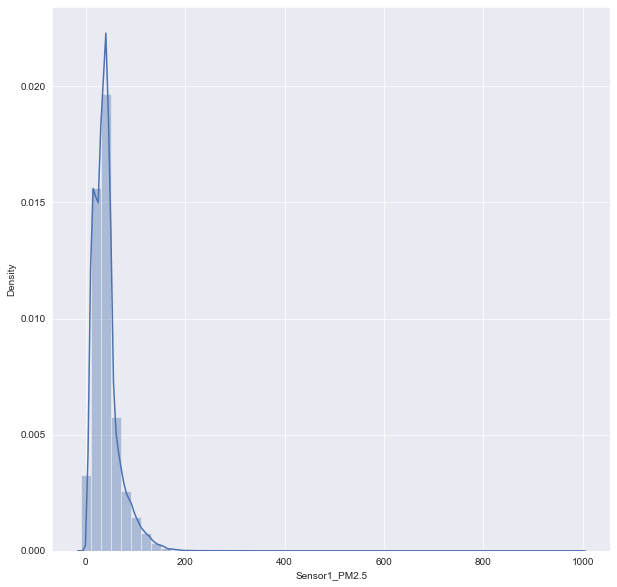

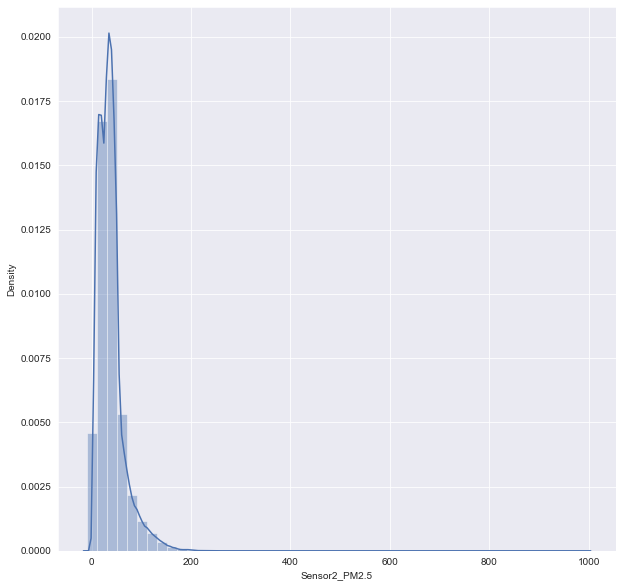

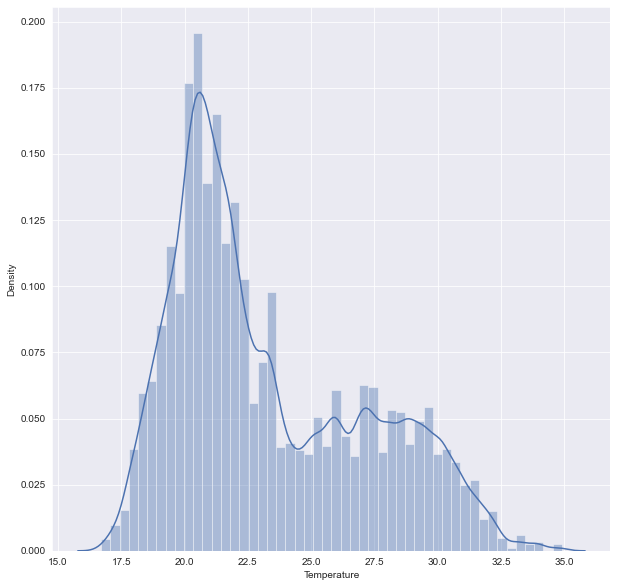

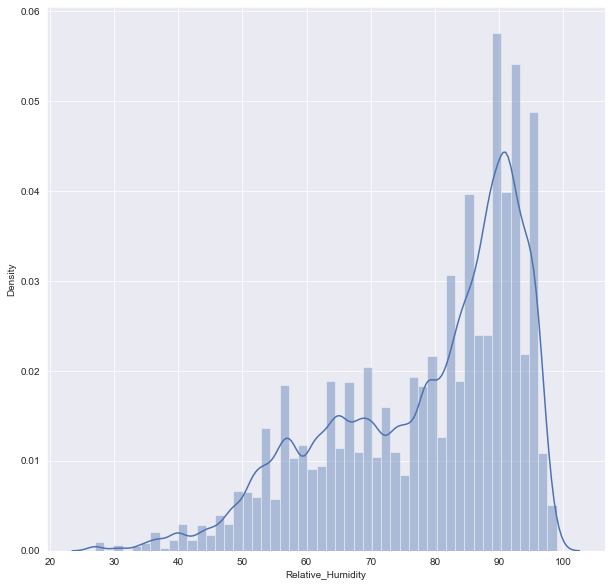

In [36]:
for i in ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']:
    sns.set({"figure.figsize":(10,10)})
    sns.distplot(train_data[i])
    plt.show()

<AxesSubplot:xlabel='Seasons', ylabel='count'>

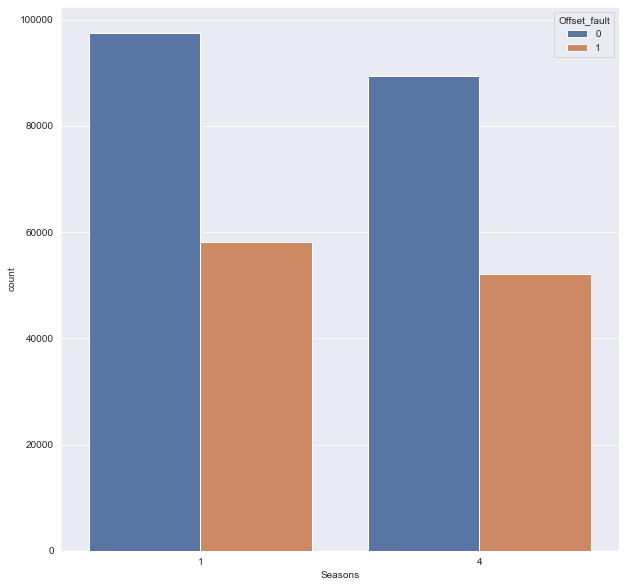

In [37]:
sns.countplot(x = "Seasons", hue = "Offset_fault", data = train_data)

<AxesSubplot:xlabel='part_of_day', ylabel='count'>

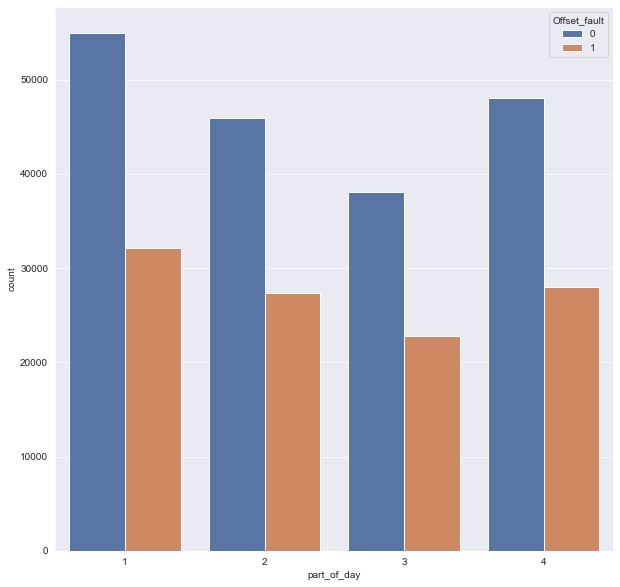

In [38]:
sns.countplot(x = "part_of_day", hue = "Offset_fault", data = train_data)

<AxesSubplot:xlabel='Relative_Humidity'>

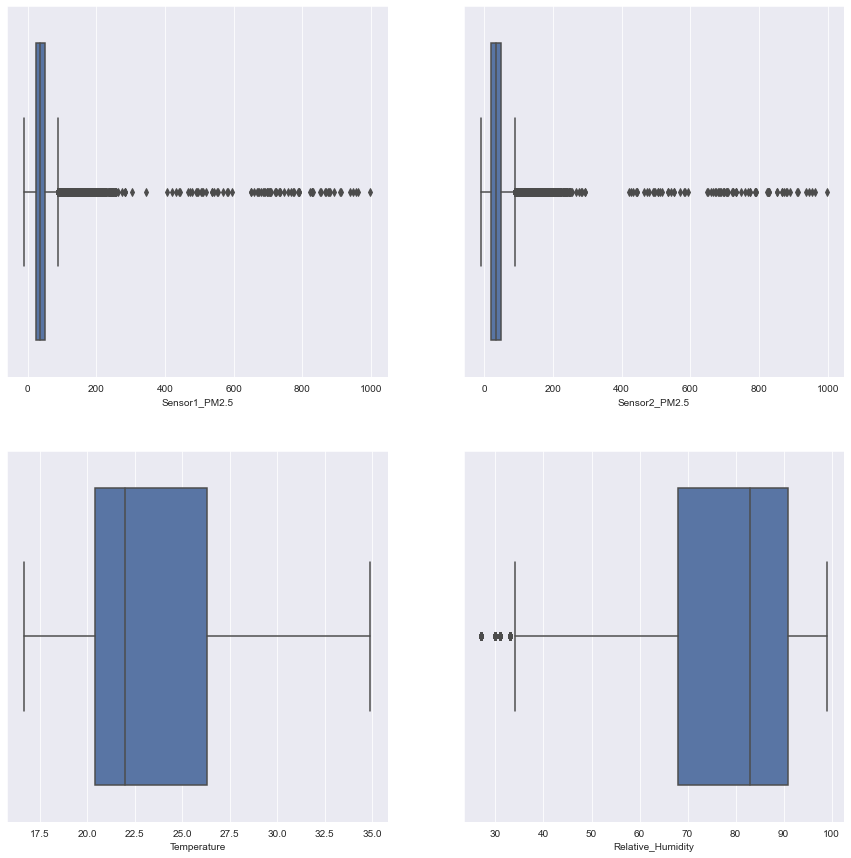

In [39]:
sns.set({"figure.figsize":(15,15)})
fig, axes = plt.subplots(2,2)

sns.boxplot(x = "Sensor1_PM2.5", data = train_data, ax = axes[0,0])
sns.boxplot(x = "Sensor2_PM2.5", data = train_data, ax = axes[0,1])
sns.boxplot(x = "Temperature", data = train_data, ax = axes[1,0])
sns.boxplot(x = "Relative_Humidity", data = train_data, ax = axes[1,1])

<AxesSubplot:xlabel='Offset_fault', ylabel='count'>

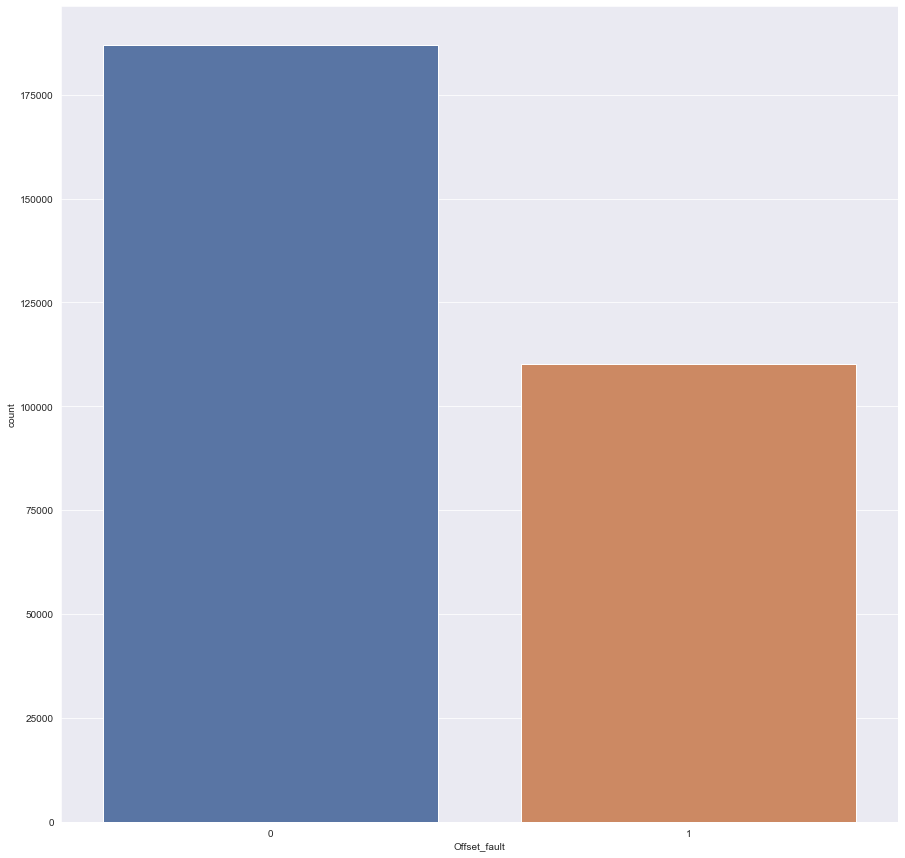

In [40]:
sns.countplot(x = "Offset_fault", data = train_data)

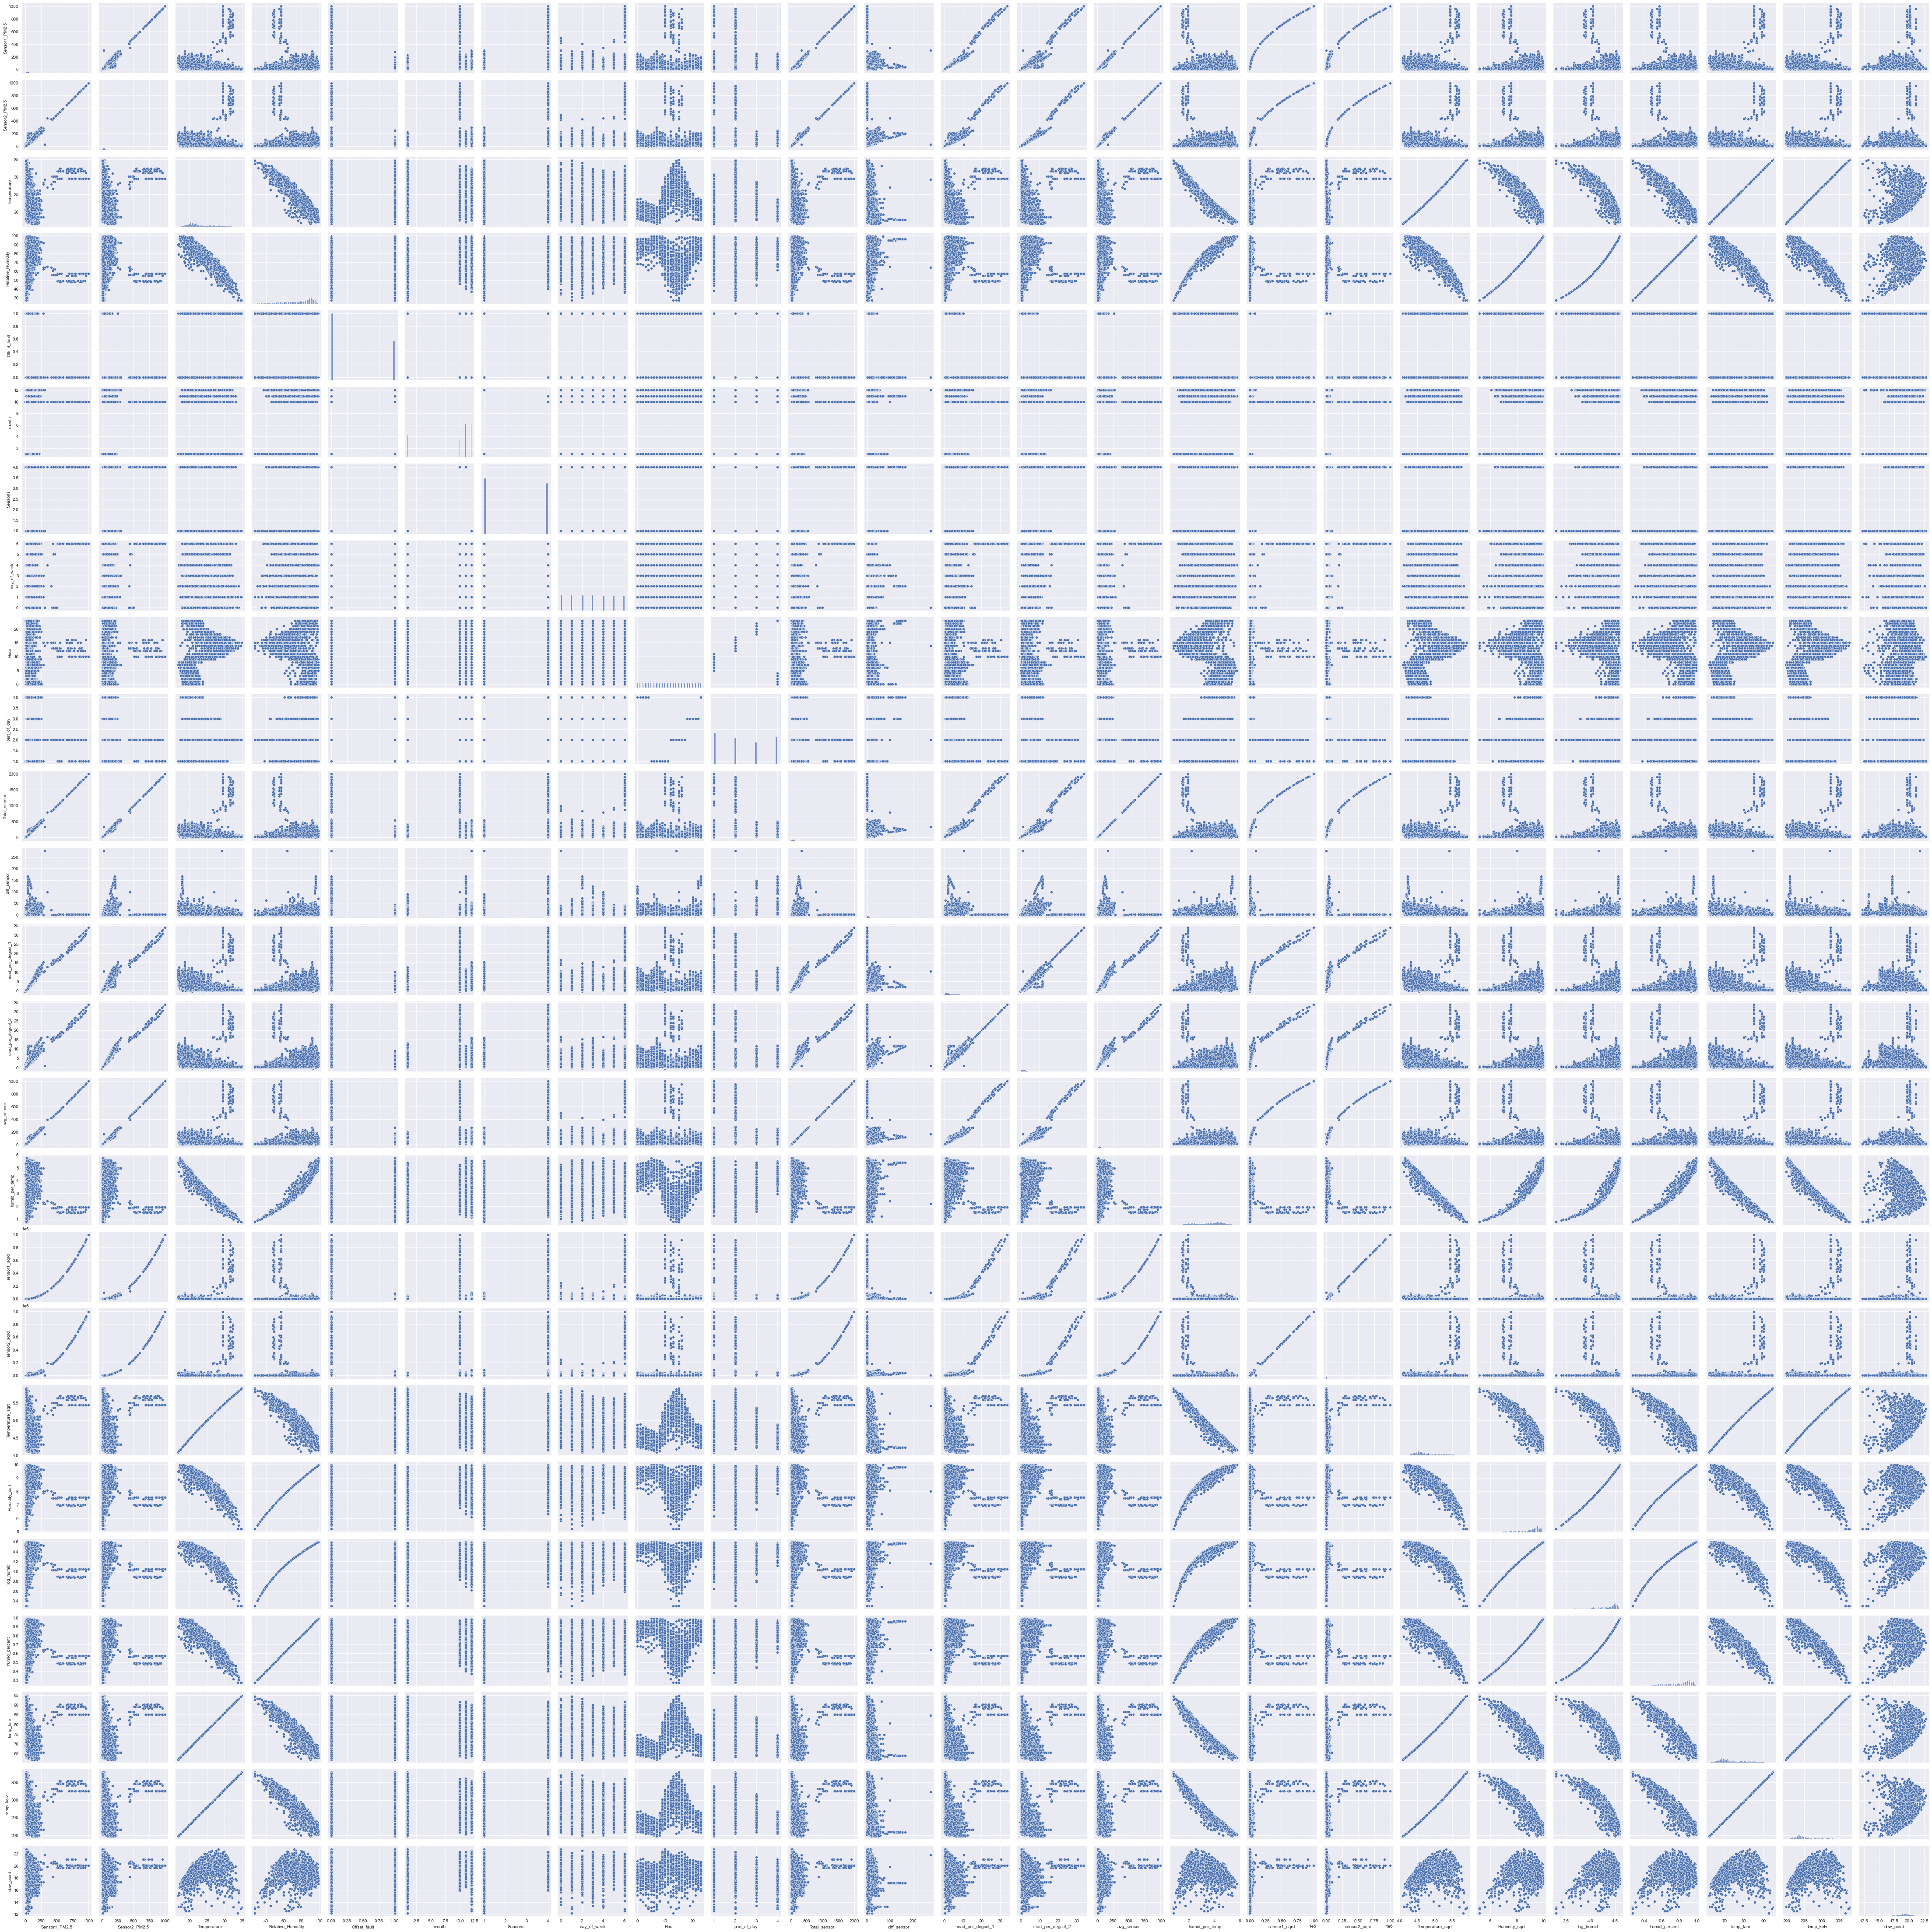

In [41]:
sns.pairplot(data = train_data)

## Scaling

In [42]:
feats = train_data[[i for i in train_data.columns if i != "Offset_fault"]]
targets = train_data["Offset_fault"]

In [43]:
feats = feats.drop(["ID","Datetime"], axis = 1)

In [44]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [cols for cols in feats.columns if feats[cols].dtype == "O"]

In [45]:
Encoder = LabelEncoder()
for columns in cat_cols:
    feats[columns] = Encoder.fit_transform(feats[columns])

In [46]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
features = pd.DataFrame(scaler.fit_transform(feats), columns = feats.columns)

In [47]:
test_data = test_data.drop(["ID"], axis = 1)

In [48]:
test_data = test_data.drop(["Datetime"], axis = 1)

In [49]:
len(test_data.columns)

27

In [50]:
for columns in cat_cols:
    test_data[columns] = Encoder.fit_transform(test_data[columns])

## Base Models

In [51]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

smote_tomek = SMOTETomek(smote = SMOTE(sampling_strategy = 0.65), tomek = TomekLinks("majority"), n_jobs = -1, random_state = 0)
train_bal, target_bal = smote_tomek.fit_resample(feats, targets)
train_scaled_bal, target_scaled_bal = smote_tomek.fit_resample(features, targets)

#### XGBoost Base model with scaled Data

In [52]:
import xgboost as xgb
xgb_acc_list_scaled = []
  
for train_index, test_index in skf.split(train_scaled_bal, target_scaled_bal):
    X_train_scaled, X_test_scaled = train_scaled_bal.loc[train_index], train_scaled_bal.loc[test_index]
    y_train_scaled, y_test_scaled = target_scaled_bal.loc[train_index], target_scaled_bal.loc[test_index]
  
    xgboost_scaled = xgb.XGBClassifier(n_jobs = -1, random_state = 0, eval_metric = "logloss")
    xgboost_scaled.fit(X_train_scaled, y_train_scaled)
    xgboost_pred_scaled = xgboost_scaled.predict(X_test_scaled)

    xgb_acc_list_scaled.append(f1_score(y_test_scaled, xgboost_pred_scaled))

In [53]:
np.mean(xgb_acc_list_scaled)

0.9504532554674894

In [54]:
print(classification_report(y_test_scaled, xgboost_pred_scaled))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18453
           1       0.95      0.95      0.95     12149

    accuracy                           0.96     30602
   macro avg       0.96      0.96      0.96     30602
weighted avg       0.96      0.96      0.96     30602



#### XGBoost Base model with unscaled Data

In [55]:
import xgboost as xgb
xgb_acc_list = []
  
for train_index, test_index in skf.split(train_bal, target_bal):
    X_train, X_test = train_bal.loc[train_index], train_bal.loc[test_index]
    y_train, y_test = target_bal.loc[train_index], target_bal.loc[test_index]
  
    xgboost = xgb.XGBClassifier(n_jobs = -1, random_state = 0, eval_metric = "logloss")
    xgboost.fit(X_train, y_train)
    xgboost_pred = xgboost.predict(X_test)

    xgb_acc_list.append(f1_score(y_test, xgboost_pred))

In [56]:
np.mean(xgb_acc_list)

0.9534981908149401

In [57]:
print(classification_report(y_test, xgboost_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18075
           1       0.96      0.95      0.95     12148

    accuracy                           0.96     30223
   macro avg       0.96      0.96      0.96     30223
weighted avg       0.96      0.96      0.96     30223



## Actual Models

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
params = {"n_estimators": range(100,500,50),
          "max_depth": range(3,10),
          "learning_rate": np.arange(0.05,0.2, 0.05)}

rand_cv = RandomizedSearchCV(estimator = xgboost,param_distributions = params, scoring = "f1", n_jobs = -1)
rand_cv.fit(X_train_ov, y_train_ov)
rand_cv.best_params_

In [ ]:
parameters = {"n_estimators": range(250,450,50),
          "max_depth": range(5,7),
          "learning_rate": np.arange(0.1,0.5,0.5)}

grid_cv = GridSearchCV(xgboost, param_grid = parameters,scoring = "f1", n_jobs = -1)
grid_cv.fit(X_train_ov, y_train_ov)
grid_cv.best_params_

In [60]:
import xgboost as xgb
xgb_list = []
  
for train_index, test_index in skf.split(train_bal, target_bal):
    X_train, X_test = train_bal.loc[train_index], train_bal.loc[test_index]
    y_train, y_test = target_bal.loc[train_index], target_bal.loc[test_index]
     
    
    xgboost = xgb.XGBClassifier(n_estimators = 350, max_depth = 7, learning_rate = 0.2, n_jobs = -1, random_state = 0,
                                eval_metric = "logloss")
    xgboost.fit(train_bal, target_bal)
    xgboost_pred = xgboost.predict(X_test)

    xgb_list.append(f1_score(y_test, xgboost_pred))

In [61]:
np.mean(xgb_list)

0.9800915722496724

In [62]:
print(classification_report(y_test, xgboost_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18075
           1       0.98      0.98      0.98     12148

    accuracy                           0.98     30223
   macro avg       0.98      0.98      0.98     30223
weighted avg       0.98      0.98      0.98     30223



In [63]:
prediction_test = xgboost.predict(test_data)
umoja_xgb1 = pd.read_csv(r"C:\Users\user\Videos\Datasets\umojahack-africa-2022-beginner-challenge\SampleSubmission.csv")
umoja_xgb1["Offset_fault"] = prediction_test
umoja_xgb1.to_csv("new_beg.csv", index = False)

### LightGBM Classifier

In [108]:
import lightgbm as LGBM

In [115]:
lgbm_acc_list_up = []
for train_index, test_index in skf.split(train_bal, target_bal):
    X_train, X_test = train_bal.loc[train_index], train_bal.loc[test_index]
    y_train, y_test = target_bal.loc[train_index], target_bal.loc[test_index]
    
    light_gbm_up = LGBM.LGBMClassifier(n_estimators = 700, max_depth = 9, learning_rate = 0.1, n_jobs = -1, random_state = 0,
                                       objective = "binary", num_leaves = 31, boosting_type = "gbdt")
    
    light_gbm_up.fit(X_train, y_train)
    lgbm_pred_up = light_gbm_up.predict(X_test)

    lgbm_acc_list_up.append(f1_score(y_test, lgbm_pred_up))

In [116]:
np.mean(lgbm_acc_list_up)

0.9618786024895394